[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/husseinlopez/diplomadoIA/blob/main/M1_Ejercicios_Visualizacion_Exploracion.ipynb)

# Módulo 1: Introducción a la Minería de Datos
## Ejercicios Prácticos de Visualización y Exploración

**Diplomado en Inteligencia Artificial**  
Dr. Irvin Hussein López Nava  
CICESE - UABC

---

### Objetivos de esta sesión

1. **Familiarizarse con las herramientas básicas** de análisis exploratorio en Python
2. **Visualizar diferentes tipos de datos** según su naturaleza (nominal, ordinal, continuo, discreto)
3. **Detectar patrones, relaciones y anomalías** antes de modelar
4. **Aplicar buenas prácticas** de visualización científica

---

### Estructura del notebook

**Parte 1:** Visualización de conjuntos de datos genéricos  
- Cantidades
- Distribuciones
- Proporciones
- Asociaciones
- Variables ordenadas

**Parte 2:** Exploración de un conjunto de datos real  
- Análisis completo de un dataset científico
- Identificación de tipos de atributos
- Detección de problemas en los datos
- Preparación para modelado

## 0. Configuración del Entorno

Importaremos las bibliotecas necesarias para todo el análisis.

In [ ]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configuración de matplotlib para mejor visualización
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Para ignorar warnings menores
import warnings
warnings.filterwarnings('ignore')

# Verificar versiones
print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print(f"Seaborn: {sns.__version__}")
print("\n✓ Entorno configurado correctamente")

Pandas: 2.2.2
NumPy: 1.24.4
Matplotlib: 3.9.4
Seaborn: 0.13.2

✓ Entorno configurado correctamente


---

# PARTE 1: Visualización de Datos Genéricos

En esta sección exploraremos los **tipos fundamentales de visualización** según el tipo de pregunta que queremos responder.

## 1.1 Visualización de Cantidades

**Pregunta:** ¿Cuánto hay de cada cosa?

Las cantidades representan magnitudes absolutas que queremos comparar entre categorías.

In [ ]:
# Crear datos de ejemplo: Producción de diferentes materiales
materiales = ['TiO₂', 'ZnO', 'Al₂O₃', 'SiO₂', 'Fe₂O₃', 'CuO']
produccion_kg = [245, 180, 320, 295, 150, 210]

# Crear DataFrame
df_materiales = pd.DataFrame({
    'Material': materiales,
    'Producción (kg)': produccion_kg
})

print("Datos de producción:")
print(df_materiales)

Datos de producción:
  Material  Producción (kg)
0     TiO₂              245
1      ZnO              180
2    Al₂O₃              320
3     SiO₂              295
4    Fe₂O₃              150
5      CuO              210


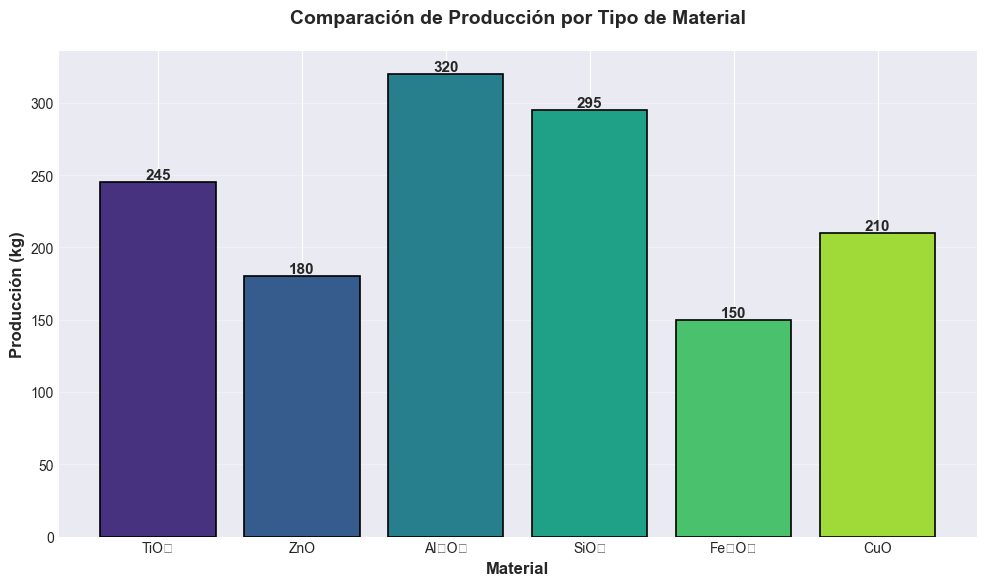


📊 Observaciones:
• El eje Y comienza en 0 para evitar distorsión visual
• Las barras facilitan comparación inmediata de magnitudes
• Material con mayor producción: Al₂O₃


In [ ]:
# Gráfico de barras: el estándar para comparar cantidades
fig, ax = plt.subplots(figsize=(10, 6))

# Crear barras con colores diferenciados
bars = ax.bar(df_materiales['Material'],
              df_materiales['Producción (kg)'],
              color=sns.color_palette("viridis", len(materiales)),
              edgecolor='black',
              linewidth=1.2)

# Personalización
ax.set_xlabel('Material', fontweight='bold')
ax.set_ylabel('Producción (kg)', fontweight='bold')
ax.set_title('Comparación de Producción por Tipo de Material',
             fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

# Añadir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.0f}',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 Observaciones:")
print("• El eje Y comienza en 0 para evitar distorsión visual")
print("• Las barras facilitan comparación inmediata de magnitudes")
print(f"• Material con mayor producción: {df_materiales.loc[df_materiales['Producción (kg)'].idxmax(), 'Material']}")

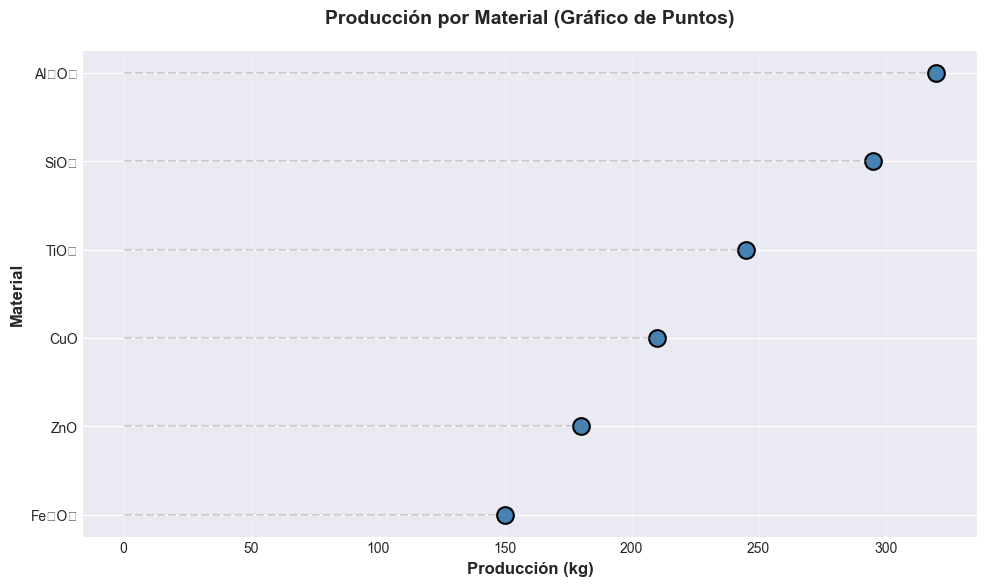


💡 Ventaja de los puntos:
• Menos 'tinta' visual innecesaria
• Mejor para comparaciones precisas entre valores cercanos
• Más escalable cuando hay muchas categorías


In [ ]:
# Gráfico de puntos: alternativa más precisa para comparaciones finas
fig, ax = plt.subplots(figsize=(10, 6))

# Ordenar datos para mejor visualización
df_sorted = df_materiales.sort_values('Producción (kg)')

# Crear gráfico de puntos
ax.plot(df_sorted['Producción (kg)'], df_sorted['Material'],
        'o', markersize=12, color='steelblue',
        markeredgecolor='black', markeredgewidth=1.5)

# Añadir líneas de referencia
for i, (material, prod) in enumerate(zip(df_sorted['Material'],
                                          df_sorted['Producción (kg)'])):
    ax.hlines(y=i, xmin=0, xmax=prod,
              colors='gray', linestyles='--', alpha=0.3)

ax.set_xlabel('Producción (kg)', fontweight='bold')
ax.set_ylabel('Material', fontweight='bold')
ax.set_title('Producción por Material (Gráfico de Puntos)',
             fontweight='bold', pad=20)
ax.set_yticks(range(len(df_sorted)))
ax.set_yticklabels(df_sorted['Material'])
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Ventaja de los puntos:")
print("• Menos 'tinta' visual innecesaria")
print("• Mejor para comparaciones precisas entre valores cercanos")
print("• Más escalable cuando hay muchas categorías")

### 🎯 Ejercicio 1: Tu turno

Crea un gráfico de barras horizontales con los siguientes datos de diferentes métodos de síntesis:

```python
metodos = ['Sol-gel', 'CVD', 'Sputtering', 'Hidrotermal', 'Coprecipitación']
tiempo_h = [8, 4, 2, 12, 6]
```

**Pistas:**
- Usa `ax.barh()` en lugar de `ax.bar()`
- Ordena los datos de menor a mayor tiempo
- Añade etiquetas con los valores

In [ ]:
# TU CÓDIGO AQUÍ



## 1.2 Visualización de Distribuciones

**Pregunta:** ¿Cómo están distribuidos los valores?

Una distribución describe cómo se reparten los valores de una variable. No solo nos interesa el promedio, sino la **forma completa** de los datos.

In [ ]:
# Generar datos simulados: temperaturas de síntesis (°C)
np.random.seed(42)

# Tres procesos con diferentes distribuciones
temp_proceso_a = np.random.normal(550, 30, 200)  # Normal
temp_proceso_b = np.random.normal(650, 50, 200)  # Normal más dispersa
temp_proceso_c = np.concatenate([np.random.normal(500, 20, 100),
                                  np.random.normal(600, 20, 100)])  # Bimodal

# Crear DataFrame
df_temp = pd.DataFrame({
    'Proceso A': temp_proceso_a,
    'Proceso B': temp_proceso_b,
    'Proceso C': temp_proceso_c
})

print("Estadísticas descriptivas:")
print(df_temp.describe().round(2))

Estadísticas descriptivas:
       Proceso A  Proceso B  Proceso C
count     200.00     200.00     200.00
mean      548.78     654.29     548.29
std        27.93      49.35      53.37
min       471.41     487.94     453.96
25%       528.85     619.71     498.61
50%       549.87     653.94     553.17
75%       565.03     684.36     597.33
max       631.61     842.64     645.41


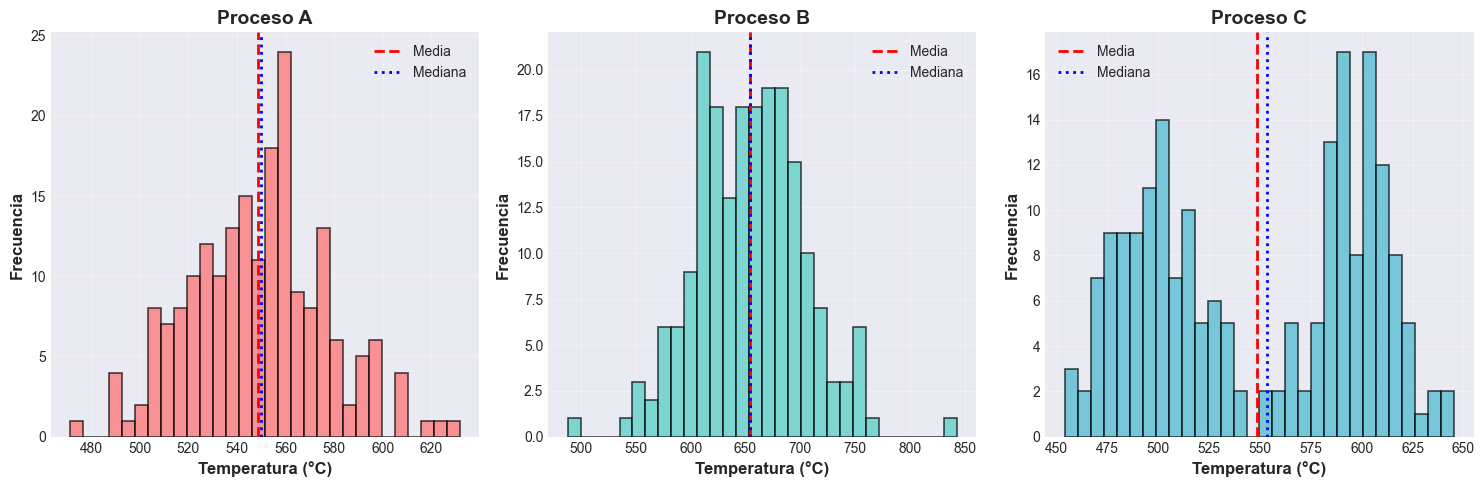


🔍 Análisis de forma:
• Proceso A: Distribución simétrica y concentrada
• Proceso B: Mayor dispersión (mayor desviación estándar)
• Proceso C: ¡Bimodal! Sugiere dos poblaciones mezcladas


In [ ]:
# Histogramas: visualizar la forma de cada distribución
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

procesos = ['Proceso A', 'Proceso B', 'Proceso C']
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for ax, proceso, color in zip(axes, procesos, colores):
    ax.hist(df_temp[proceso], bins=30, color=color,
            alpha=0.7, edgecolor='black', linewidth=1.2)
    ax.axvline(df_temp[proceso].mean(), color='red',
               linestyle='--', linewidth=2, label='Media')
    ax.axvline(df_temp[proceso].median(), color='blue',
               linestyle=':', linewidth=2, label='Mediana')
    ax.set_xlabel('Temperatura (°C)', fontweight='bold')
    ax.set_ylabel('Frecuencia', fontweight='bold')
    ax.set_title(proceso, fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔍 Análisis de forma:")
print("• Proceso A: Distribución simétrica y concentrada")
print("• Proceso B: Mayor dispersión (mayor desviación estándar)")
print("• Proceso C: ¡Bimodal! Sugiere dos poblaciones mezcladas")

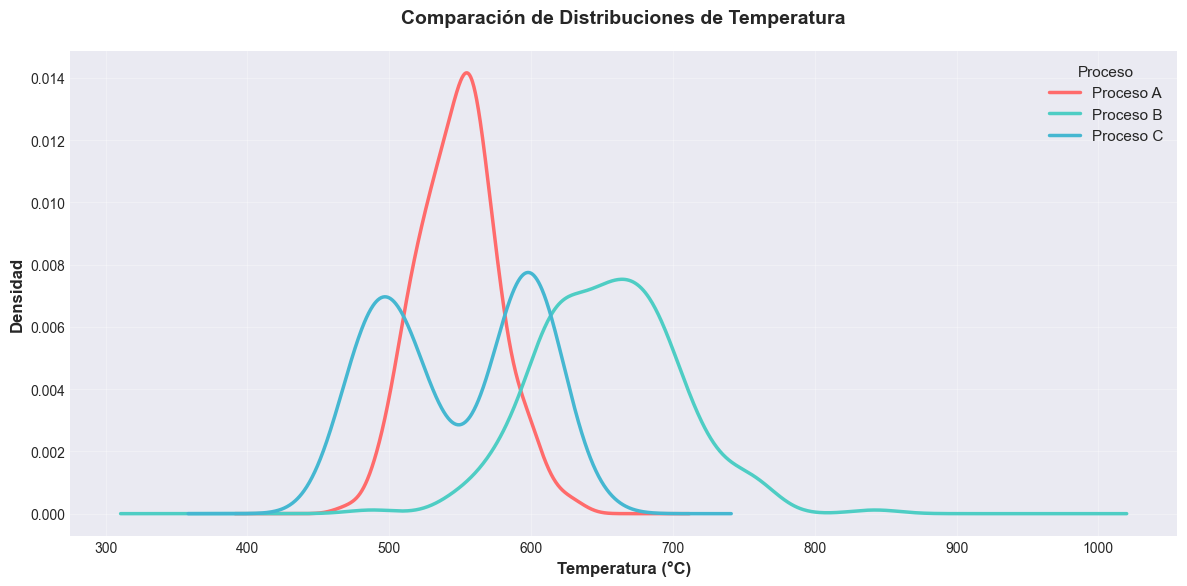


✨ Ventaja de las curvas de densidad:
• Facilitan la comparación directa entre distribuciones
• Representación suavizada (no dependen del número de bins)
• Revelan claramente la bimodalidad del Proceso C


In [ ]:
# Curvas de densidad: comparación suavizada
fig, ax = plt.subplots(figsize=(12, 6))

for proceso, color in zip(procesos, colores):
    df_temp[proceso].plot(kind='kde', ax=ax, label=proceso,
                          color=color, linewidth=2.5)

ax.set_xlabel('Temperatura (°C)', fontweight='bold')
ax.set_ylabel('Densidad', fontweight='bold')
ax.set_title('Comparación de Distribuciones de Temperatura',
             fontweight='bold', pad=20)
ax.legend(title='Proceso', fontsize=11)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✨ Ventaja de las curvas de densidad:")
print("• Facilitan la comparación directa entre distribuciones")
print("• Representación suavizada (no dependen del número de bins)")
print("• Revelan claramente la bimodalidad del Proceso C")

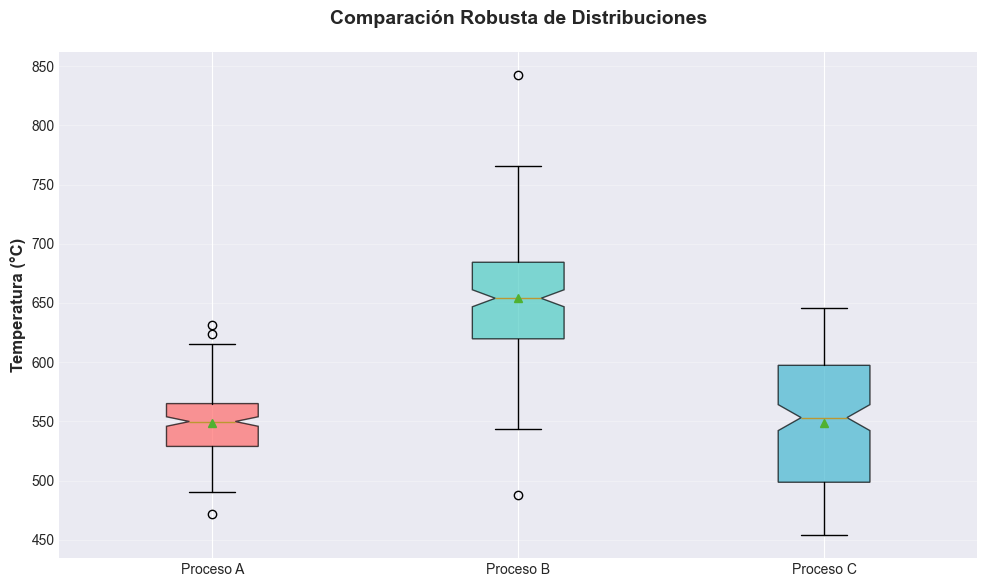


📦 Componentes del diagrama de caja:
• Línea central: Mediana (Q2)
• Caja: Rango intercuartílico (Q1 a Q3)
• Bigotes: Hasta 1.5×IQR desde la caja
• Puntos: Valores atípicos (outliers)
• Triángulo verde: Media

💪 Ventajas: Resistente a outliers, comparación directa, compacto


In [ ]:
# Diagramas de caja: resumen estadístico robusto
fig, ax = plt.subplots(figsize=(10, 6))

# Crear boxplot
bp = ax.boxplot([df_temp[p] for p in procesos],
                 labels=procesos,
                 patch_artist=True,
                 notch=True,
                 showmeans=True)

# Colorear las cajas
for patch, color in zip(bp['boxes'], colores):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_ylabel('Temperatura (°C)', fontweight='bold')
ax.set_title('Comparación Robusta de Distribuciones',
             fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📦 Componentes del diagrama de caja:")
print("• Línea central: Mediana (Q2)")
print("• Caja: Rango intercuartílico (Q1 a Q3)")
print("• Bigotes: Hasta 1.5×IQR desde la caja")
print("• Puntos: Valores atípicos (outliers)")
print("• Triángulo verde: Media")
print("\n💪 Ventajas: Resistente a outliers, comparación directa, compacto")

### 🎯 Ejercicio 2: Análisis de distribuciones

Genera datos de energía de banda prohibida (eV) para tres semiconductores:

```python
eg_tio2 = np.random.normal(3.2, 0.15, 150)
eg_zno = np.random.normal(3.37, 0.12, 150)
eg_wo3 = np.random.normal(2.8, 0.2, 150)
```

Crea:
1. Un violin plot comparativo (usa `sns.violinplot()`)
2. Calcula e imprime: media, mediana y desviación estándar de cada uno

In [22]:
# TU CÓDIGO AQUÍ
# Generar datos simulados: temperaturas de síntesis (°C)
np.random.seed(42)

# Tres materiales con energias diferentes
eg_tio2 = np.random.normal(3.2, 0.15, 150)
eg_zno = np.random.normal(3.37, 0.12, 150)
eg_wo3 = np.random.normal(2.8, 0.2, 150)

# Crear DataFrame
df_temp = pd.DataFrame({
    'TiO2': eg_tio2,
    'ZnO': eg_zno,
    'WO3': eg_wo3
})

print("Bandas prohibidas:")
print(df_temp.describe().round(2))


Bandas prohibidas:
         TiO2     ZnO     WO3
count  150.00  150.00  150.00
mean     3.19    3.38    2.81
std      0.14    0.12    0.19
min      2.81    2.98    2.38
25%      3.10    3.29    2.68
50%      3.19    3.39    2.81
75%      3.27    3.45    2.94
max      3.57    3.83    3.24


## 1.3 Visualización de Proporciones

**Pregunta:** ¿Qué fracción del todo corresponde a cada categoría?

Las proporciones describen cómo se reparte un total entre categorías.

In [ ]:
# Datos: Composición de muestras por método de síntesis
data_composicion = {
    'Método': ['Sol-gel', 'Sol-gel', 'Sol-gel',
               'CVD', 'CVD', 'CVD',
               'Hidrotermal', 'Hidrotermal', 'Hidrotermal'],
    'Fase': ['Anatasa', 'Rutilo', 'Brookita',
             'Anatasa', 'Rutilo', 'Brookita',
             'Anatasa', 'Rutilo', 'Brookita'],
    'Proporción': [0.65, 0.30, 0.05,
                   0.45, 0.50, 0.05,
                   0.80, 0.15, 0.05]
}

df_comp = pd.DataFrame(data_composicion)
print(df_comp)

        Método      Fase  Proporción
0      Sol-gel   Anatasa        0.65
1      Sol-gel    Rutilo        0.30
2      Sol-gel  Brookita        0.05
3          CVD   Anatasa        0.45
4          CVD    Rutilo        0.50
5          CVD  Brookita        0.05
6  Hidrotermal   Anatasa        0.80
7  Hidrotermal    Rutilo        0.15
8  Hidrotermal  Brookita        0.05


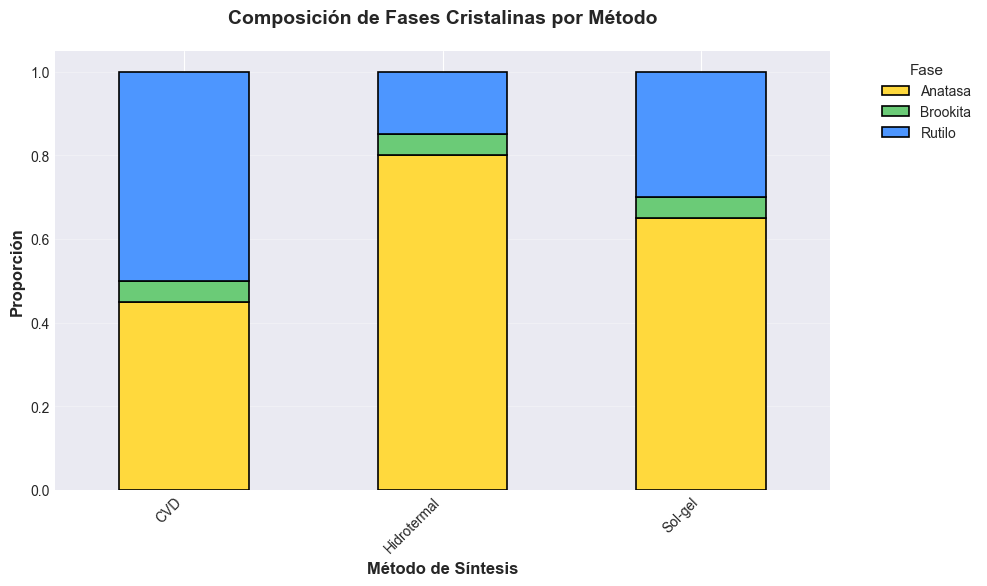


🔬 Observaciones:
• Hidrotermal favorece fuertemente la fase Anatasa
• CVD produce mayor proporción de Rutilo
• Brookita aparece en pequeña proporción en todos los métodos


In [ ]:
# Barras apiladas al 100%
df_pivot = df_comp.pivot(index='Método', columns='Fase', values='Proporción')

fig, ax = plt.subplots(figsize=(10, 6))

df_pivot.plot(kind='bar', stacked=True, ax=ax,
              color=['#FFD93D', '#6BCB77', '#4D96FF'],
              edgecolor='black', linewidth=1.2)

ax.set_ylabel('Proporción', fontweight='bold')
ax.set_xlabel('Método de Síntesis', fontweight='bold')
ax.set_title('Composición de Fases Cristalinas por Método',
             fontweight='bold', pad=20)
ax.legend(title='Fase', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔬 Observaciones:")
print("• Hidrotermal favorece fuertemente la fase Anatasa")
print("• CVD produce mayor proporción de Rutilo")
print("• Brookita aparece en pequeña proporción en todos los métodos")

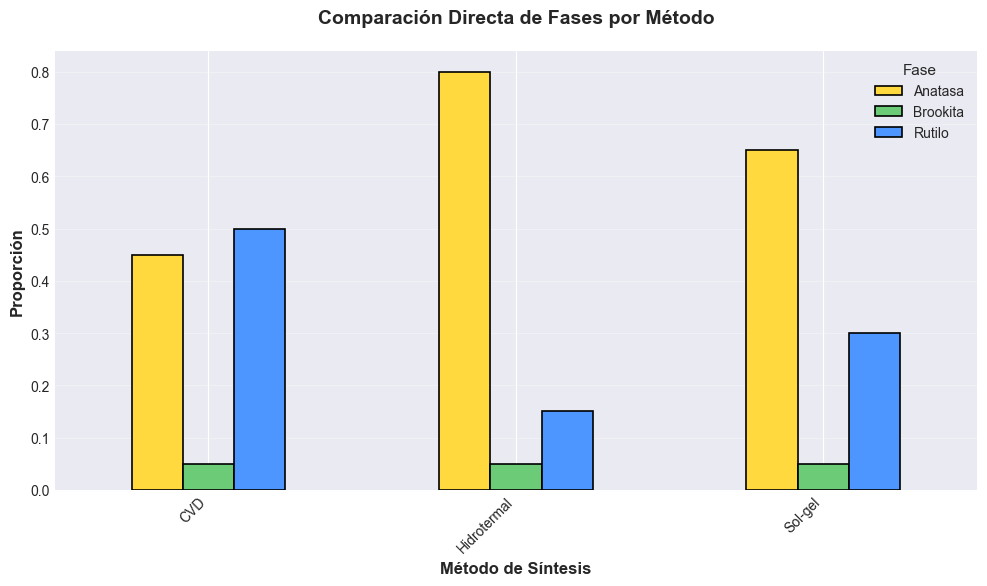


📊 Cuándo usar cada tipo:
• Barras apiladas → Ver composición total de cada grupo
• Barras lado a lado → Comparar categorías específicas entre grupos


In [ ]:
# Barras lado a lado: mejor para comparar categorías específicas
fig, ax = plt.subplots(figsize=(10, 6))

df_pivot.plot(kind='bar', ax=ax,
              color=['#FFD93D', '#6BCB77', '#4D96FF'],
              edgecolor='black', linewidth=1.2)

ax.set_ylabel('Proporción', fontweight='bold')
ax.set_xlabel('Método de Síntesis', fontweight='bold')
ax.set_title('Comparación Directa de Fases por Método',
             fontweight='bold', pad=20)
ax.legend(title='Fase')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Cuándo usar cada tipo:")
print("• Barras apiladas → Ver composición total de cada grupo")
print("• Barras lado a lado → Comparar categorías específicas entre grupos")

## 1.4 Visualización de Asociaciones

**Pregunta:** ¿Cómo varían conjuntamente dos o más variables?

Las asociaciones revelan relaciones, tendencias y estructuras latentes en los datos.

In [ ]:
# Generar datos simulados: propiedades de materiales
np.random.seed(42)
n = 100

# Variables correlacionadas
temperatura = np.random.uniform(400, 800, n)
cristalinidad = 20 + 0.08 * temperatura + np.random.normal(0, 5, n)
tamano_grano = 10 + 0.05 * temperatura + np.random.normal(0, 3, n)
eficiencia = 30 + 0.3 * cristalinidad + 0.2 * tamano_grano + np.random.normal(0, 8, n)

# Crear DataFrame
df_prop = pd.DataFrame({
    'Temperatura (°C)': temperatura,
    'Cristalinidad (%)': cristalinidad,
    'Tamaño grano (nm)': tamano_grano,
    'Eficiencia (%)': eficiencia
})

print("Primeras filas:")
print(df_prop.head())
print("\nEstadísticas:")
print(df_prop.describe().round(2))

Primeras filas:
   Temperatura (°C)  Cristalinidad (%)  Tamaño grano (nm)  Eficiencia (%)
0        549.816048          64.420519          37.529808       58.424595
1        780.285723          80.927821          53.374888       60.151589
2        692.797577          75.882610          43.845908       62.092381
3        639.463394          61.219227          50.133677       55.309995
4        462.407456          55.894237          34.997375       54.675885

Estadísticas:
       Temperatura (°C)  Cristalinidad (%)  Tamaño grano (nm)  Eficiencia (%)
count            100.00             100.00             100.00          100.00
mean             588.07              67.04              39.51           58.92
std              119.00               9.92               6.81            7.79
min              402.21              48.47              27.56           40.67
25%              477.28              58.81              34.52           52.32
50%              585.66              66.27              3

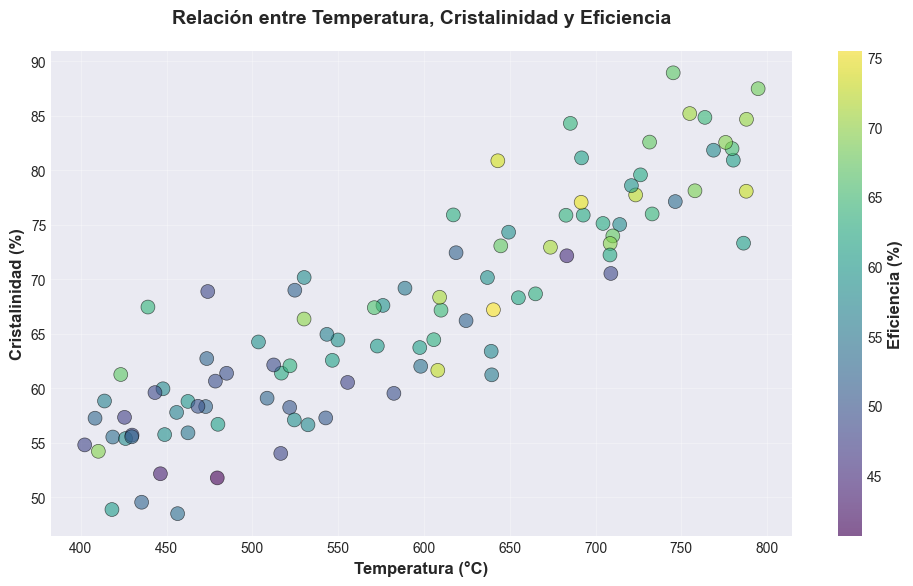


🔍 Patrones observables:
• Relación positiva entre temperatura y cristalinidad
• Mayor eficiencia asociada con mayor cristalinidad
• No hay agrupamientos evidentes (distribución continua)


In [ ]:
# Diagrama de dispersión simple
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(df_prop['Temperatura (°C)'],
                     df_prop['Cristalinidad (%)'],
                     c=df_prop['Eficiencia (%)'],
                     cmap='viridis',
                     s=100,
                     alpha=0.6,
                     edgecolors='black',
                     linewidth=0.5)

# Añadir barra de color
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Eficiencia (%)', fontweight='bold')

ax.set_xlabel('Temperatura (°C)', fontweight='bold')
ax.set_ylabel('Cristalinidad (%)', fontweight='bold')
ax.set_title('Relación entre Temperatura, Cristalinidad y Eficiencia',
             fontweight='bold', pad=20)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔍 Patrones observables:")
print("• Relación positiva entre temperatura y cristalinidad")
print("• Mayor eficiencia asociada con mayor cristalinidad")
print("• No hay agrupamientos evidentes (distribución continua)")

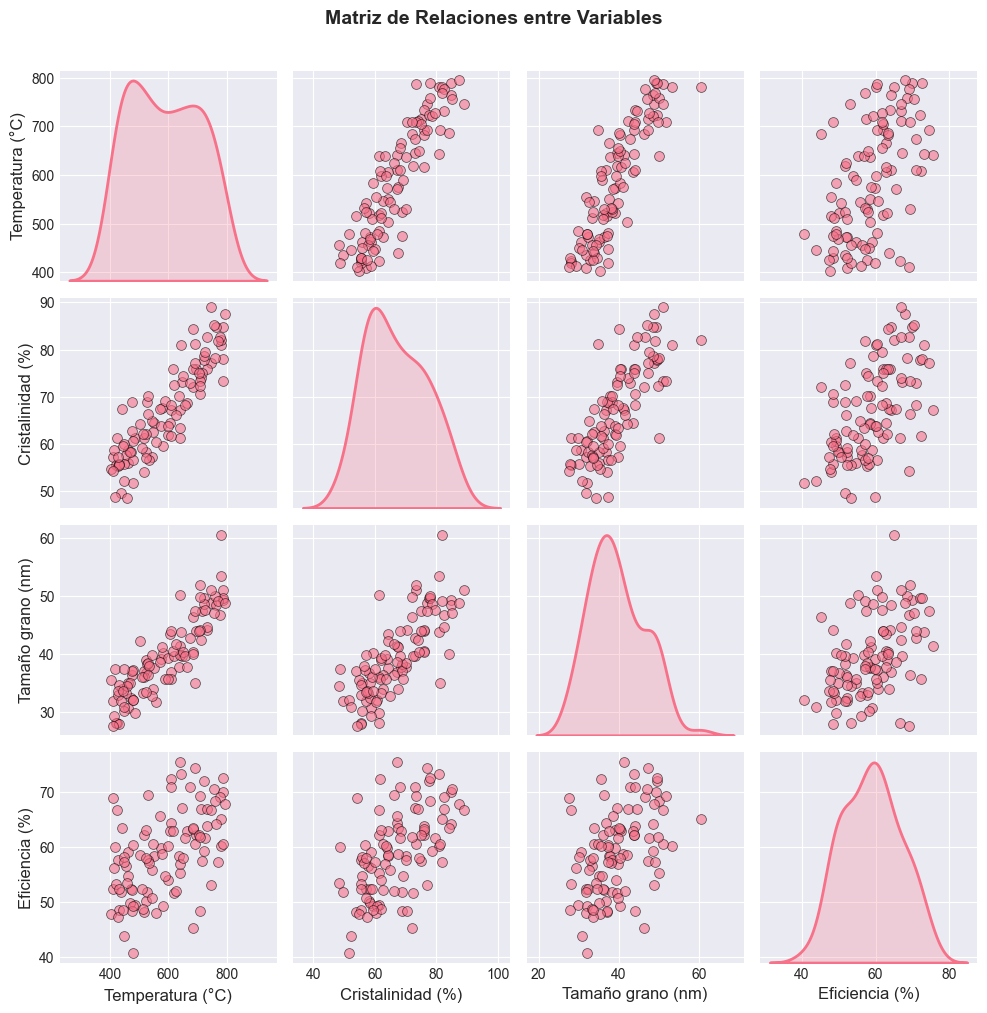


🎯 Utilidad del pairplot:
• Explora todas las relaciones bivariadas simultáneamente
• Diagonal muestra distribución de cada variable
• Fuera de diagonal: diagramas de dispersión
• Ideal para detección rápida de correlaciones


In [ ]:
# Pairplot: matriz de dispersión para todas las combinaciones
g = sns.pairplot(df_prop,
                 diag_kind='kde',
                 plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'black'},
                 diag_kws={'linewidth': 2})

g.fig.suptitle('Matriz de Relaciones entre Variables',
               y=1.01, fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

print("\n🎯 Utilidad del pairplot:")
print("• Explora todas las relaciones bivariadas simultáneamente")
print("• Diagonal muestra distribución de cada variable")
print("• Fuera de diagonal: diagramas de dispersión")
print("• Ideal para detección rápida de correlaciones")

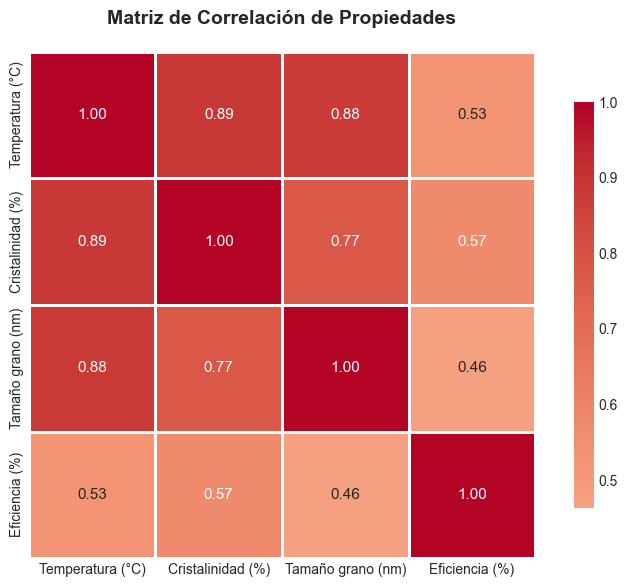


📊 Interpretación:
• Correlación Temperatura-Cristalinidad: 0.891
• Correlación Cristalinidad-Eficiencia: 0.574

⚠️ Recordatorio: Correlación ≠ Causalidad


In [ ]:
# Matriz de correlación
correlacion = df_prop.corr()

fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(correlacion,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8},
            ax=ax)

ax.set_title('Matriz de Correlación de Propiedades',
             fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n📊 Interpretación:")
print(f"• Correlación Temperatura-Cristalinidad: {correlacion.loc['Temperatura (°C)', 'Cristalinidad (%)']:.3f}")
print(f"• Correlación Cristalinidad-Eficiencia: {correlacion.loc['Cristalinidad (%)', 'Eficiencia (%)']:.3f}")
print("\n⚠️ Recordatorio: Correlación ≠ Causalidad")

### 🎯 Ejercicio 3: Detectar relaciones

Crea un dataset con las siguientes variables:
- Tiempo de tratamiento térmico (100-500 min)
- Área superficial (50-150 m²/g) - correlacionada negativamente con tiempo
- Actividad catalítica - correlacionada positivamente con área superficial

Genera 80 muestras y:
1. Crea un scatter plot de Tiempo vs Área superficial
2. Calcula la matriz de correlación
3. Identifica qué variable tiene mayor correlación con Actividad catalítica

In [ ]:
# TU CÓDIGO AQUÍ



## 1.5 Visualización de Variables Ordenadas (Series)

**Pregunta:** ¿Cómo cambia una variable a lo largo de una secuencia ordenada?

Las variables ordenadas tienen una progresión natural (tiempo, dosis, iteración, etc.)

In [ ]:
# Datos: Degradación de un contaminante bajo luz UV
tiempo_min = np.arange(0, 121, 5)
concentracion_ppm = 100 * np.exp(-0.025 * tiempo_min) + np.random.normal(0, 2, len(tiempo_min))

df_degr = pd.DataFrame({
    'Tiempo (min)': tiempo_min,
    'Concentración (ppm)': concentracion_ppm
})

print("Datos de degradación:")
print(df_degr.head(10))

Datos de degradación:
   Tiempo (min)  Concentración (ppm)
0             0           101.744641
1             5            88.616374
2            10            82.259684
3            15            67.112331
4            20            58.973622
5            25            52.327358
6            30            42.988864
7            35            40.634692
8            40            35.269679
9            45            32.766034


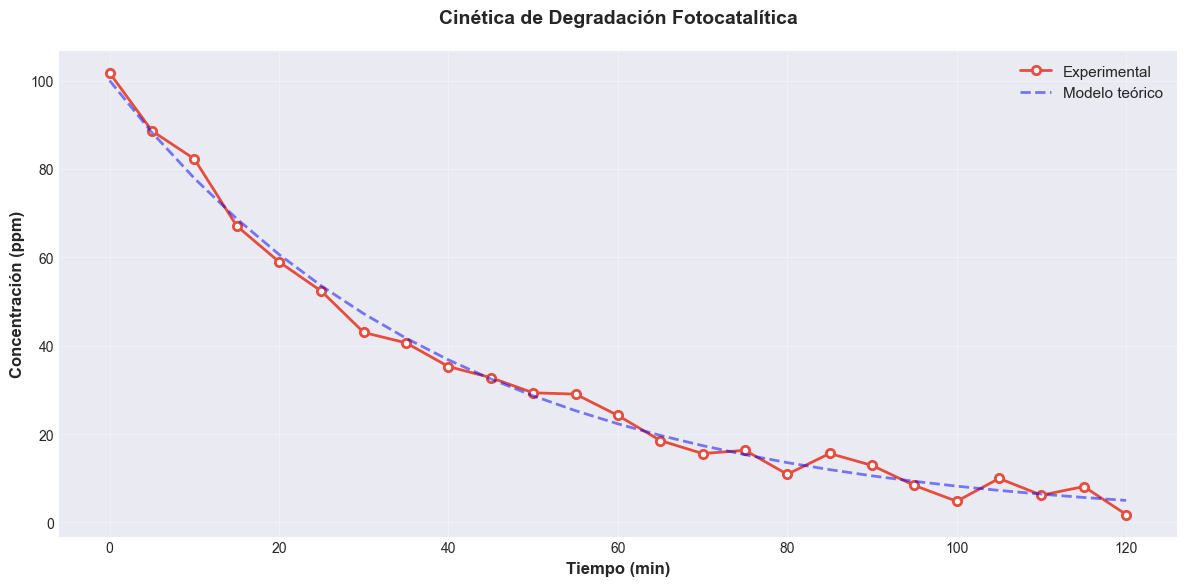


📈 Observaciones:
• Tendencia exponencial decreciente clara
• Buen ajuste al modelo teórico (cinética de primer orden)
• Degradación del 98.2% en 120 min


In [ ]:
# Gráfico de línea: estándar para series ordenadas
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_degr['Tiempo (min)'], df_degr['Concentración (ppm)'],
        marker='o', markersize=6, linewidth=2, color='#E74C3C',
        markerfacecolor='white', markeredgecolor='#E74C3C',
        markeredgewidth=2, label='Experimental')

# Añadir línea teórica
teorico = 100 * np.exp(-0.025 * tiempo_min)
ax.plot(tiempo_min, teorico, '--', linewidth=2,
        color='blue', alpha=0.5, label='Modelo teórico')

ax.set_xlabel('Tiempo (min)', fontweight='bold')
ax.set_ylabel('Concentración (ppm)', fontweight='bold')
ax.set_title('Cinética de Degradación Fotocatalítica',
             fontweight='bold', pad=20)
ax.legend(fontsize=11)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📈 Observaciones:")
print("• Tendencia exponencial decreciente clara")
print("• Buen ajuste al modelo teórico (cinética de primer orden)")
print(f"• Degradación del {((df_degr.iloc[0, 1] - df_degr.iloc[-1, 1]) / df_degr.iloc[0, 1] * 100):.1f}% en 120 min")

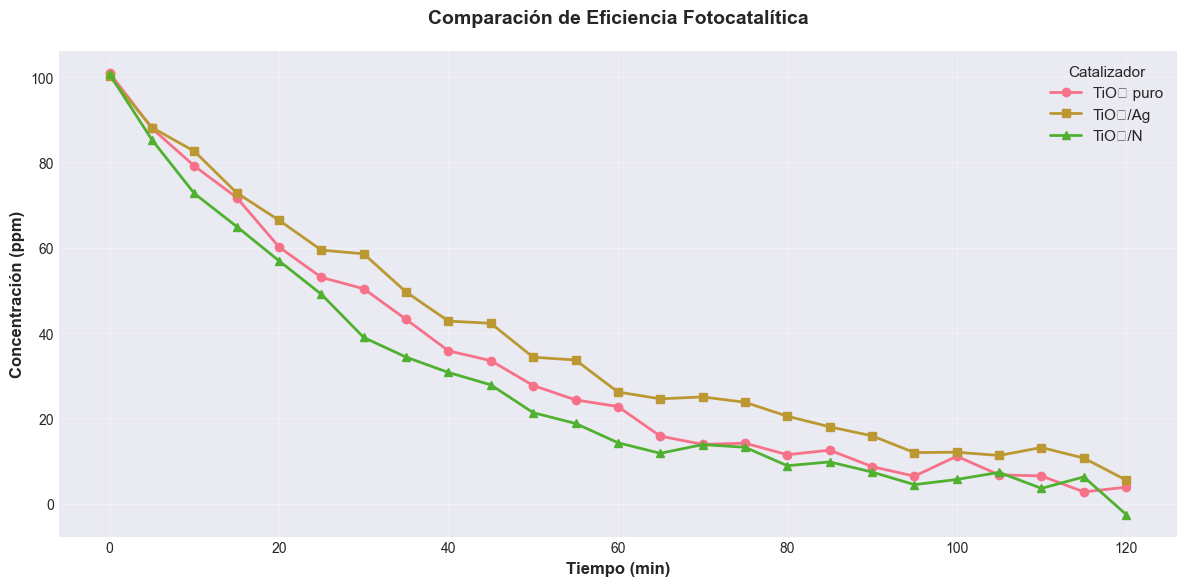


🏆 Ranking de eficiencia:
1. TiO₂/N (dopado con nitrógeno) - degradación más rápida
2. TiO₂ puro - eficiencia intermedia
3. TiO₂/Ag - degradación más lenta


In [ ]:
# Series múltiples: comparar diferentes catalizadores
np.random.seed(42)
cat_a = 100 * np.exp(-0.025 * tiempo_min) + np.random.normal(0, 2, len(tiempo_min))
cat_b = 100 * np.exp(-0.020 * tiempo_min) + np.random.normal(0, 2, len(tiempo_min))
cat_c = 100 * np.exp(-0.030 * tiempo_min) + np.random.normal(0, 2, len(tiempo_min))

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(tiempo_min, cat_a, marker='o', label='TiO₂ puro', linewidth=2)
ax.plot(tiempo_min, cat_b, marker='s', label='TiO₂/Ag', linewidth=2)
ax.plot(tiempo_min, cat_c, marker='^', label='TiO₂/N', linewidth=2)

ax.set_xlabel('Tiempo (min)', fontweight='bold')
ax.set_ylabel('Concentración (ppm)', fontweight='bold')
ax.set_title('Comparación de Eficiencia Fotocatalítica',
             fontweight='bold', pad=20)
ax.legend(title='Catalizador', fontsize=11)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🏆 Ranking de eficiencia:")
print("1. TiO₂/N (dopado con nitrógeno) - degradación más rápida")
print("2. TiO₂ puro - eficiencia intermedia")
print("3. TiO₂/Ag - degradación más lenta")

---

# PARTE 2: Exploración de Datos Reales

Ahora aplicaremos todo lo aprendido a un **dataset real completo**.

## 2.1 Carga y Descripción del Dataset

Usaremos el **Wine Quality Dataset** - un conjunto de datos clásico con propiedades fisicoquímicas de vinos.

In [ ]:
# Cargar dataset desde UCI Machine Learning Repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

# Leer datos
df_wine = pd.read_csv(url, sep=';')

print("✓ Dataset cargado exitosamente\n")
print(f"Dimensiones: {df_wine.shape[0]} muestras × {df_wine.shape[1]} variables\n")
print("Primeras filas:")
print(df_wine.head())

✓ Dataset cargado exitosamente

Dimensiones: 1599 muestras × 12 variables

Primeras filas:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56

In [ ]:
# Información general del dataset
print("INFORMACIÓN GENERAL")
print("="*60)
df_wine.info()

print("\n" + "="*60)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*60)
print(df_wine.describe().round(2))

print("\n" + "="*60)
print("VALORES FALTANTES")
print("="*60)
missing = df_wine.isnull().sum()
if missing.sum() == 0:
    print("✓ No hay valores faltantes en el dataset")
else:
    print(missing[missing > 0])

INFORMACIÓN GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

ESTADÍSTICAS DESCRIPTIVAS
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count   

## 2.2 Identificación de Tipos de Atributos

Recordemos la clasificación de atributos:
- **Nominales:** Categorías sin orden
- **Ordinales:** Categorías con orden
- **Discretos:** Valores enteros contables
- **Continuos:** Valores reales

In [ ]:
# Clasificar atributos según su naturaleza
print("CLASIFICACIÓN DE ATRIBUTOS")
print("="*60)

# Atributos continuos (mediciones fisicoquímicas)
atributos_continuos = [
    'fixed acidity', 'volatile acidity', 'citric acid',
    'residual sugar', 'chlorides', 'free sulfur dioxide',
    'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
]

# Atributo ordinal (calidad del vino)
atributo_ordinal = 'quality'

print("\n📏 ATRIBUTOS CONTINUOS (11):")
for attr in atributos_continuos:
    rango = df_wine[attr].max() - df_wine[attr].min()
    print(f"  • {attr:25s} [{df_wine[attr].min():.2f} - {df_wine[attr].max():.2f}], rango: {rango:.2f}")

print(f"\n🎯 ATRIBUTO ORDINAL (1):")
print(f"  • {atributo_ordinal}")
print(f"    Valores únicos: {sorted(df_wine[atributo_ordinal].unique())}")
print(f"    Distribución:")
print(df_wine[atributo_ordinal].value_counts().sort_index())

CLASIFICACIÓN DE ATRIBUTOS

📏 ATRIBUTOS CONTINUOS (11):
  • fixed acidity             [4.60 - 15.90], rango: 11.30
  • volatile acidity          [0.12 - 1.58], rango: 1.46
  • citric acid               [0.00 - 1.00], rango: 1.00
  • residual sugar            [0.90 - 15.50], rango: 14.60
  • chlorides                 [0.01 - 0.61], rango: 0.60
  • free sulfur dioxide       [1.00 - 72.00], rango: 71.00
  • total sulfur dioxide      [6.00 - 289.00], rango: 283.00
  • density                   [0.99 - 1.00], rango: 0.01
  • pH                        [2.74 - 4.01], rango: 1.27
  • sulphates                 [0.33 - 2.00], rango: 1.67
  • alcohol                   [8.40 - 14.90], rango: 6.50

🎯 ATRIBUTO ORDINAL (1):
  • quality
    Valores únicos: [3, 4, 5, 6, 7, 8]
    Distribución:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


## 2.3 Exploración Visual Sistemática

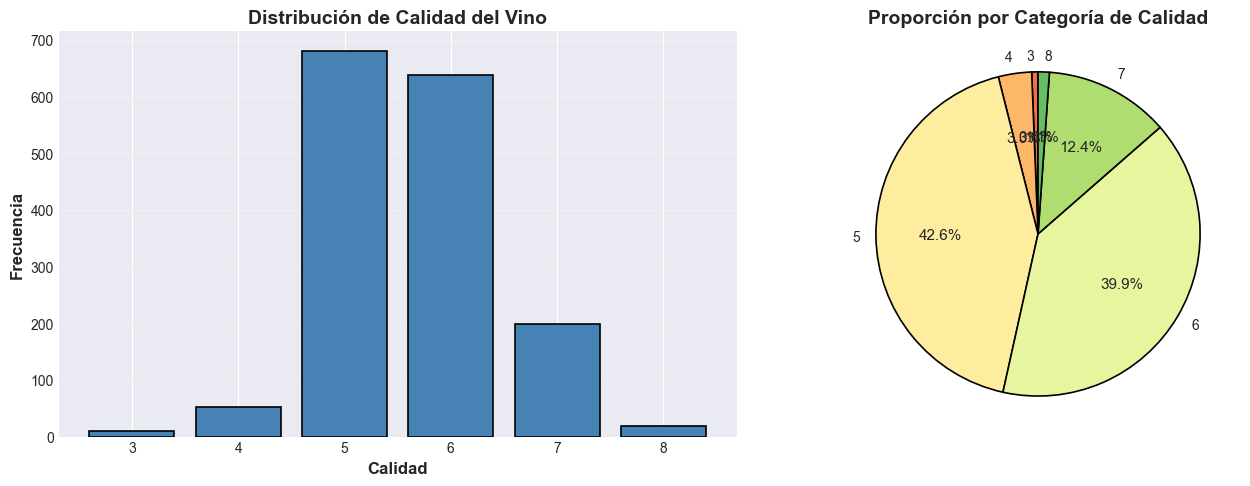


🎯 ANÁLISIS DE LA VARIABLE OBJETIVO:
• Calidad mínima: 3
• Calidad máxima: 8
• Calidad modal: 5
• Calidad media: 5.64

⚠️ Observación: Dataset desbalanceado - mayoría de vinos con calidad 5-6


In [ ]:
# 1. Variable objetivo: distribución de calidad
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
quality_counts = df_wine['quality'].value_counts().sort_index()
ax1.bar(quality_counts.index, quality_counts.values,
        color='steelblue', edgecolor='black', linewidth=1.2)
ax1.set_xlabel('Calidad', fontweight='bold')
ax1.set_ylabel('Frecuencia', fontweight='bold')
ax1.set_title('Distribución de Calidad del Vino', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Gráfico de pastel
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(quality_counts)))
ax2.pie(quality_counts.values, labels=quality_counts.index,
        autopct='%1.1f%%', colors=colors, startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.2})
ax2.set_title('Proporción por Categoría de Calidad', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🎯 ANÁLISIS DE LA VARIABLE OBJETIVO:")
print(f"• Calidad mínima: {df_wine['quality'].min()}")
print(f"• Calidad máxima: {df_wine['quality'].max()}")
print(f"• Calidad modal: {df_wine['quality'].mode()[0]}")
print(f"• Calidad media: {df_wine['quality'].mean():.2f}")
print("\n⚠️ Observación: Dataset desbalanceado - mayoría de vinos con calidad 5-6")

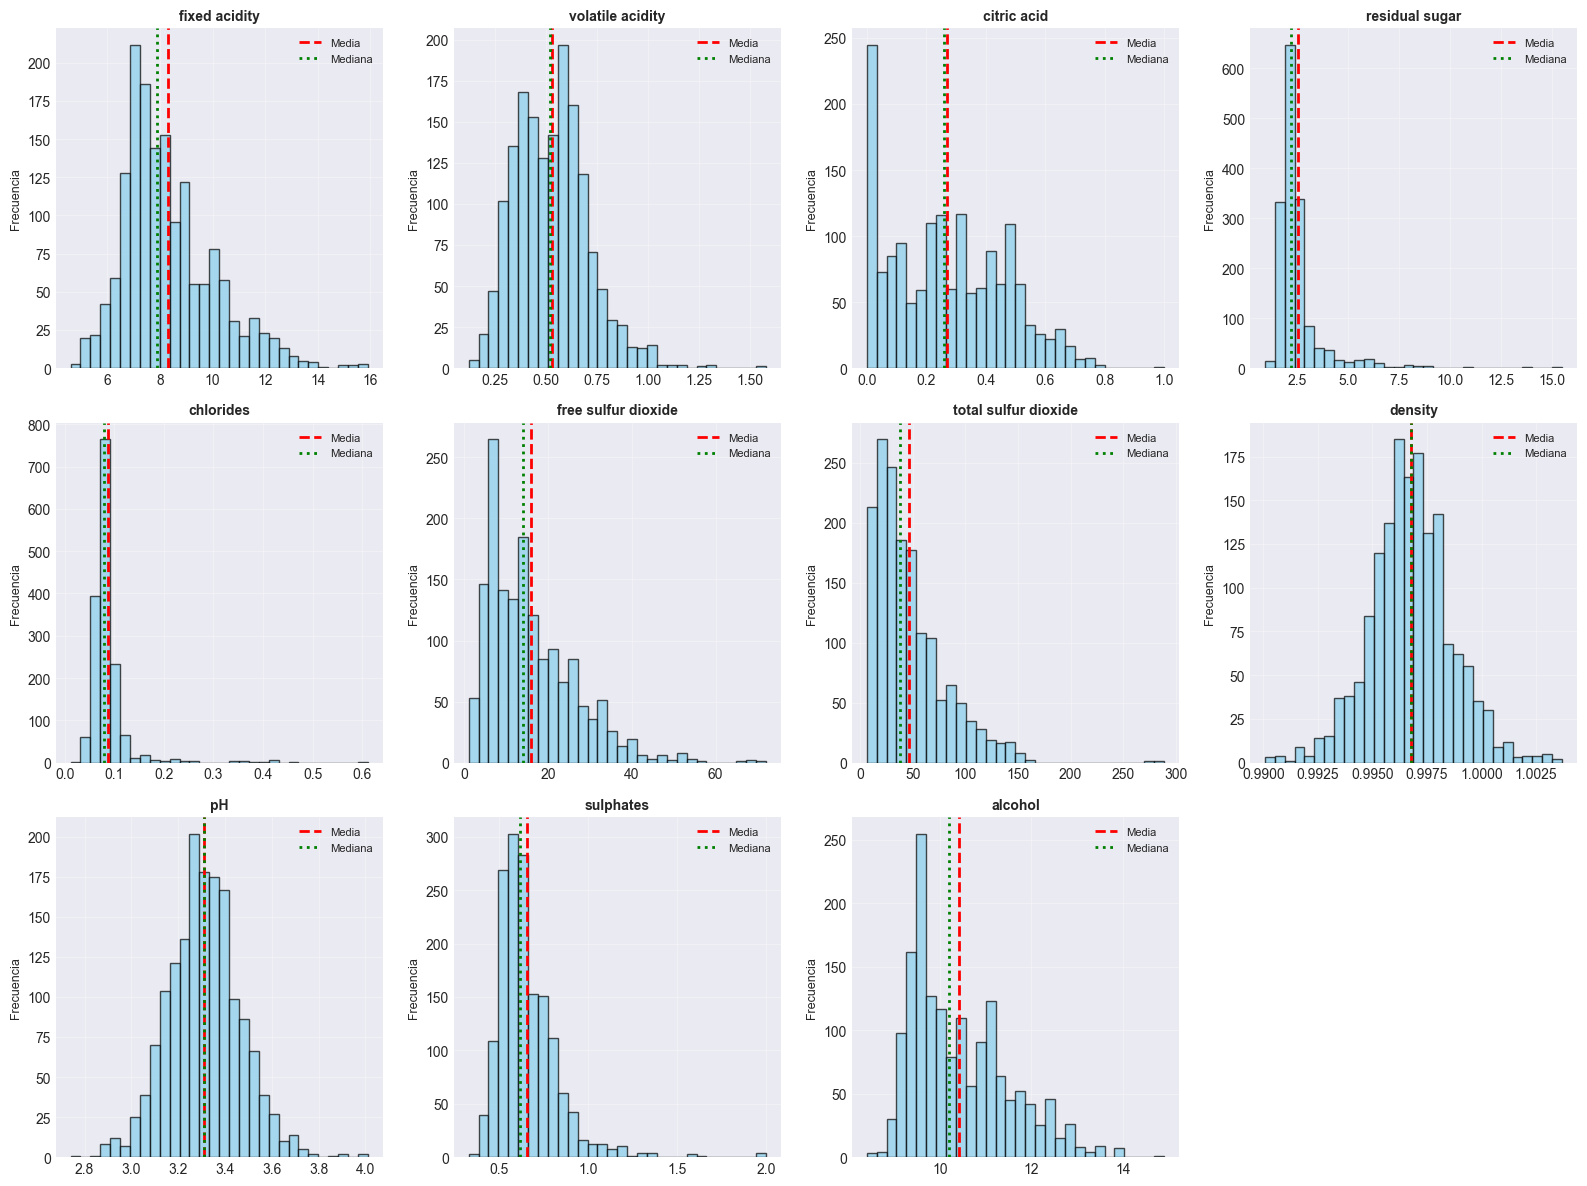


🔍 ANÁLISIS DE FORMAS:
• Mayoría de variables muestran asimetría positiva (cola derecha)
• Algunas tienen outliers evidentes (ej: residual sugar, chlorides)
• pH muestra distribución más simétrica


In [ ]:
# 2. Distribuciones de variables continuas
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(atributos_continuos):
    axes[idx].hist(df_wine[col], bins=30, color='skyblue',
                   edgecolor='black', alpha=0.7)
    axes[idx].axvline(df_wine[col].mean(), color='red',
                      linestyle='--', linewidth=2, label='Media')
    axes[idx].axvline(df_wine[col].median(), color='green',
                      linestyle=':', linewidth=2, label='Mediana')
    axes[idx].set_title(col, fontweight='bold', fontsize=10)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Frecuencia', fontsize=9)
    axes[idx].legend(fontsize=8)
    axes[idx].grid(alpha=0.3)

# Ocultar subplot extra
axes[-1].axis('off')

plt.tight_layout()
plt.show()

print("\n🔍 ANÁLISIS DE FORMAS:")
print("• Mayoría de variables muestran asimetría positiva (cola derecha)")
print("• Algunas tienen outliers evidentes (ej: residual sugar, chlorides)")
print("• pH muestra distribución más simétrica")

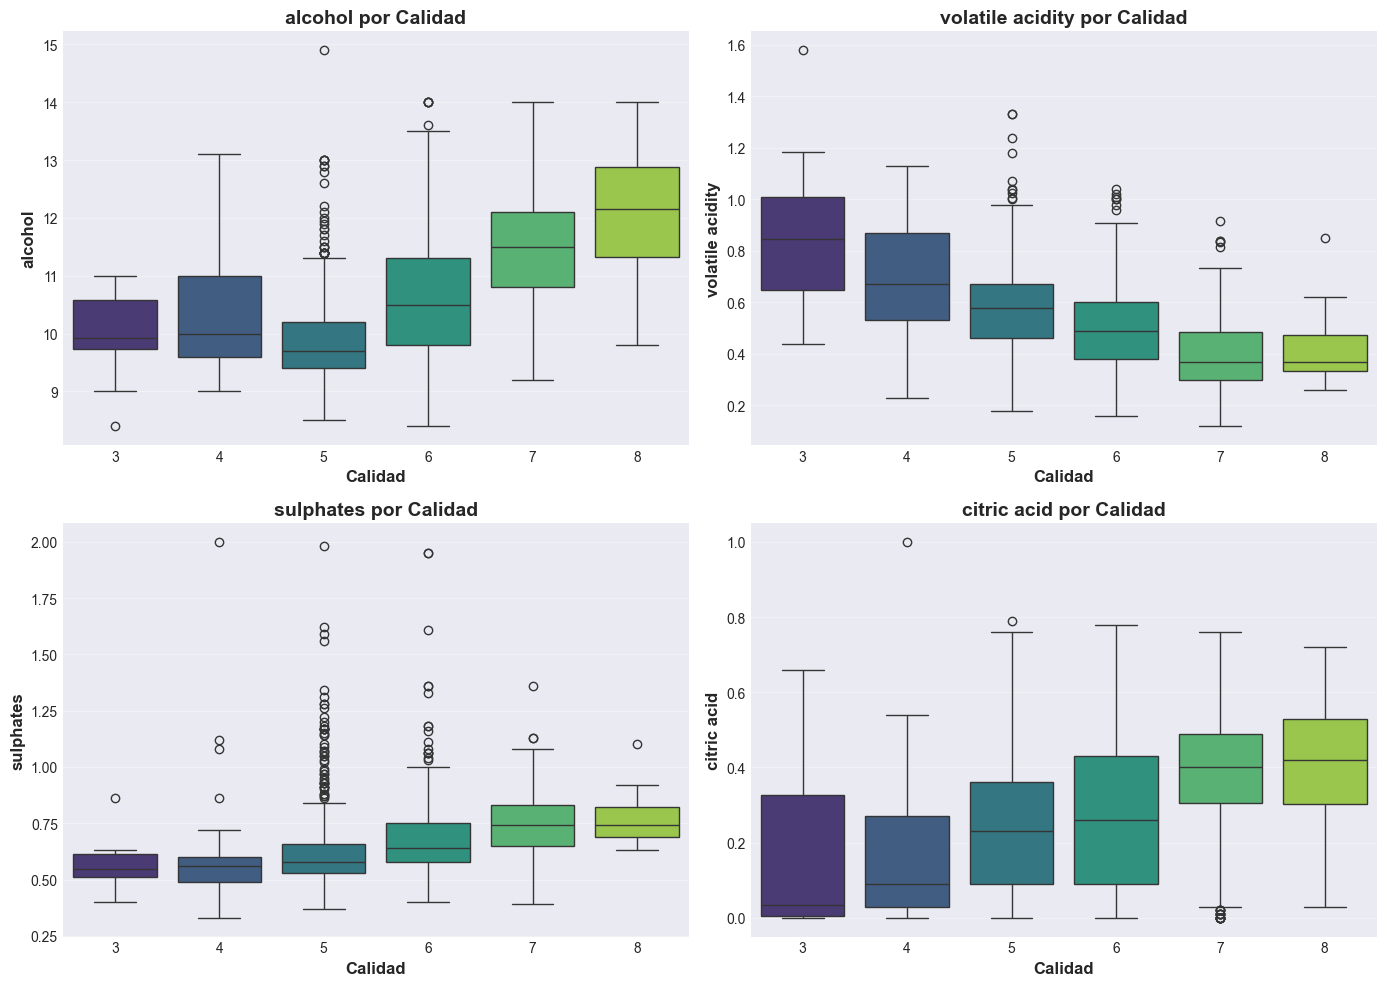


📊 PATRONES OBSERVADOS:
• Alcohol: Tendencia positiva con calidad
• Volatile acidity: Tendencia negativa con calidad
• Sulphates: Leve tendencia positiva
• Citric acid: Relación menos clara


In [ ]:
# 3. Comparación de distribuciones por calidad
# Seleccionar 4 variables clave
variables_clave = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, var in enumerate(variables_clave):
    sns.boxplot(data=df_wine, x='quality', y=var, ax=axes[idx],
                palette='viridis')
    axes[idx].set_title(f'{var} por Calidad', fontweight='bold')
    axes[idx].set_xlabel('Calidad', fontweight='bold')
    axes[idx].set_ylabel(var, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 PATRONES OBSERVADOS:")
print("• Alcohol: Tendencia positiva con calidad")
print("• Volatile acidity: Tendencia negativa con calidad")
print("• Sulphates: Leve tendencia positiva")
print("• Citric acid: Relación menos clara")

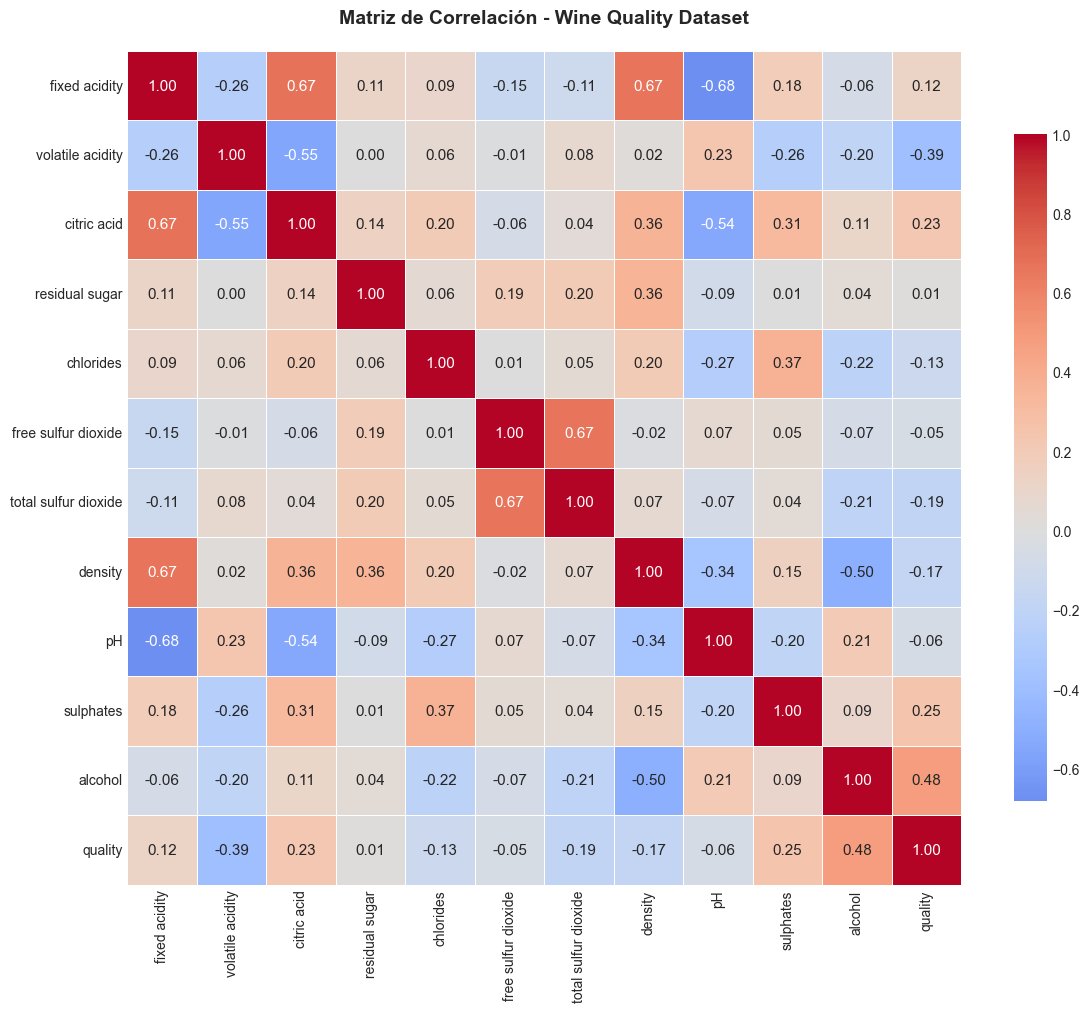


🎯 CORRELACIONES CON CALIDAD (ordenadas):
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [ ]:
# 4. Matriz de correlación completa
# Calcular correlación
correlacion = df_wine.corr()

# Crear figura
fig, ax = plt.subplots(figsize=(12, 10))

# Heatmap
sns.heatmap(correlacion, annot=True, fmt='.2f',
            cmap='coolwarm', center=0,
            square=True, linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            ax=ax)

ax.set_title('Matriz de Correlación - Wine Quality Dataset',
             fontweight='bold', pad=20, fontsize=14)

plt.tight_layout()
plt.show()

# Correlaciones más fuertes con 'quality'
quality_corr = correlacion['quality'].sort_values(ascending=False)
print("\n🎯 CORRELACIONES CON CALIDAD (ordenadas):")
print(quality_corr)

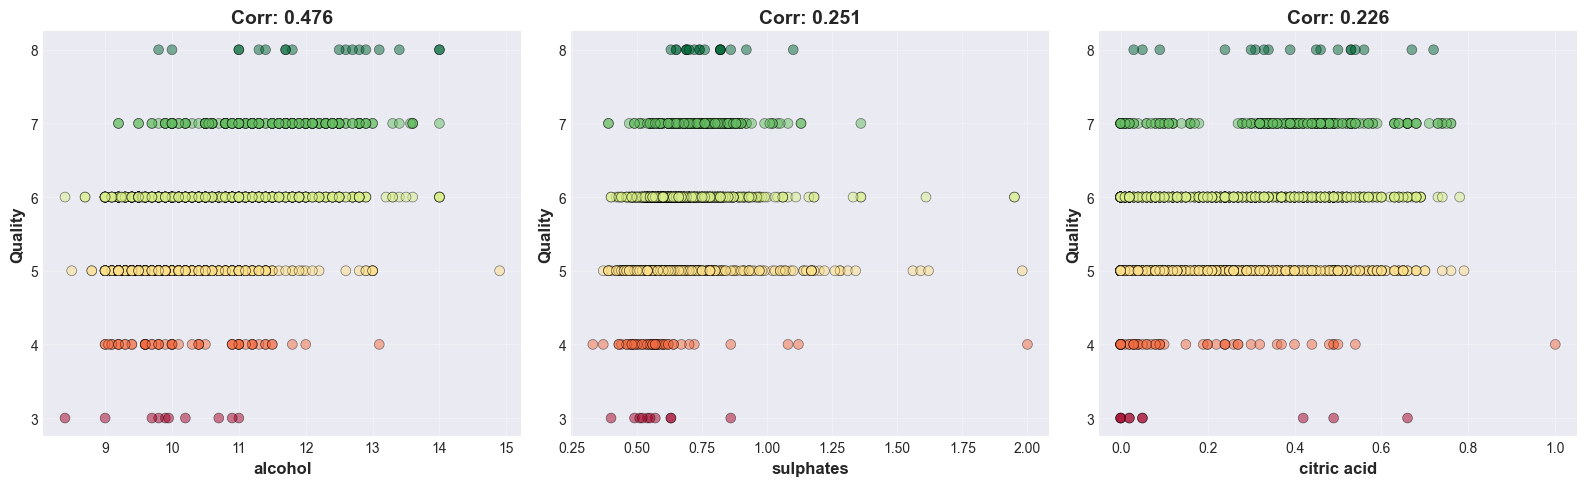


✨ VARIABLES MÁS PREDICTIVAS:
• alcohol: r = 0.476
• sulphates: r = 0.251
• citric acid: r = 0.226


In [ ]:
# 5. Scatter plots de las variables más correlacionadas con calidad
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Top 3 correlaciones positivas (excluyendo quality consigo misma)
top_vars = quality_corr.index[1:4]  # Excluir 'quality' misma

for idx, var in enumerate(top_vars):
    scatter = axes[idx].scatter(df_wine[var], df_wine['quality'],
                                c=df_wine['quality'], cmap='RdYlGn',
                                s=50, alpha=0.5, edgecolors='black',
                                linewidth=0.5)
    axes[idx].set_xlabel(var, fontweight='bold')
    axes[idx].set_ylabel('Quality', fontweight='bold')
    axes[idx].set_title(f'Corr: {quality_corr[var]:.3f}', fontweight='bold')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✨ VARIABLES MÁS PREDICTIVAS:")
for var in top_vars:
    print(f"• {var}: r = {quality_corr[var]:.3f}")

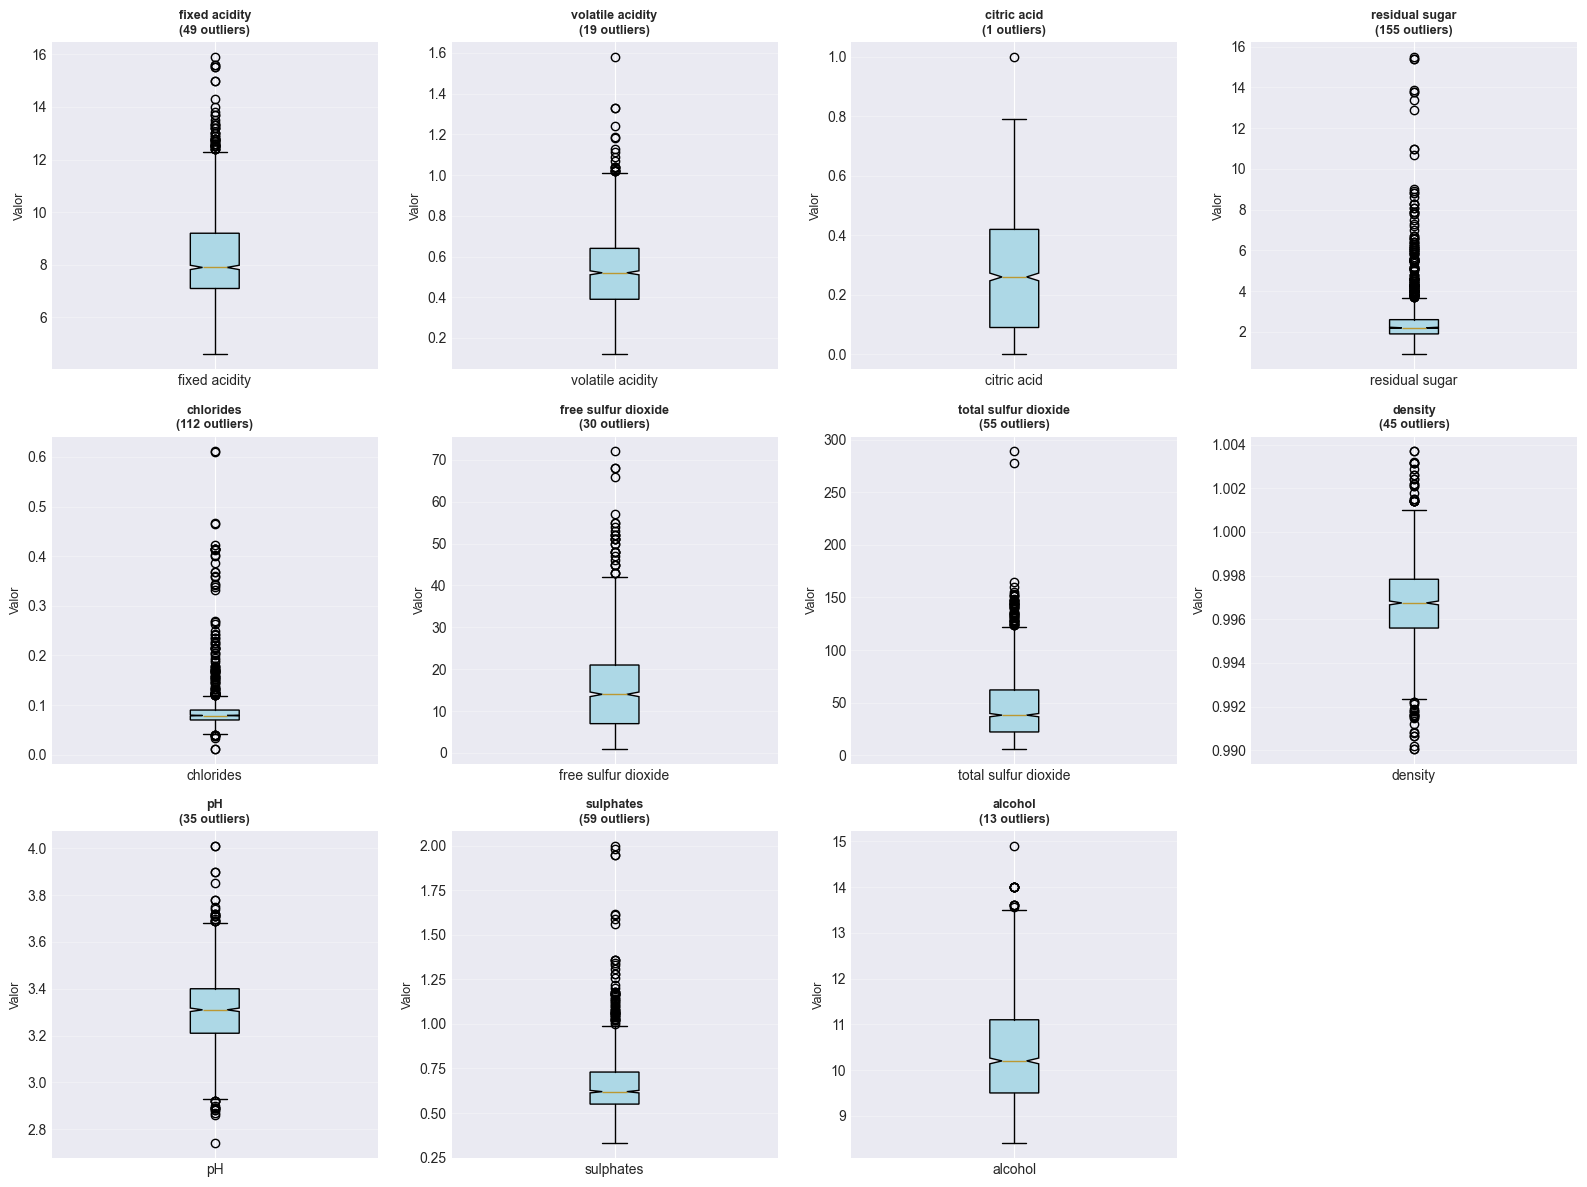


⚠️ RESUMEN DE OUTLIERS:
• residual sugar           :  155 outliers ( 9.69%)
• chlorides                :  112 outliers ( 7.00%)
• sulphates                :   59 outliers ( 3.69%)
• total sulfur dioxide     :   55 outliers ( 3.44%)
• fixed acidity            :   49 outliers ( 3.06%)
• density                  :   45 outliers ( 2.81%)
• pH                       :   35 outliers ( 2.19%)
• free sulfur dioxide      :   30 outliers ( 1.88%)
• volatile acidity         :   19 outliers ( 1.19%)
• alcohol                  :   13 outliers ( 0.81%)
• citric acid              :    1 outliers ( 0.06%)


In [ ]:
# 6. Detección de outliers mediante boxplots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

outliers_info = {}

for idx, col in enumerate(atributos_continuos):
    # Calcular outliers usando IQR
    Q1 = df_wine[col].quantile(0.25)
    Q3 = df_wine[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_wine[(df_wine[col] < lower_bound) | (df_wine[col] > upper_bound)]
    outliers_info[col] = len(outliers)

    # Boxplot
    bp = axes[idx].boxplot([df_wine[col]],
                           labels=[col],
                           patch_artist=True,
                           notch=True)
    bp['boxes'][0].set_facecolor('lightblue')
    axes[idx].set_ylabel('Valor', fontsize=9)
    axes[idx].set_title(f'{col}\n({len(outliers)} outliers)',
                       fontweight='bold', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

# Ocultar subplot extra
axes[-1].axis('off')

plt.tight_layout()
plt.show()

print("\n⚠️ RESUMEN DE OUTLIERS:")
for var, count in sorted(outliers_info.items(), key=lambda x: x[1], reverse=True):
    pct = (count / len(df_wine)) * 100
    print(f"• {var:25s}: {count:4d} outliers ({pct:5.2f}%)")

## 2.4 Identificación de Problemas y Decisiones

Basándonos en la exploración visual, identificamos los principales retos:

In [ ]:
print("="*70)
print("REPORTE DE HALLAZGOS Y DECISIONES PARA PREPROCESAMIENTO")
print("="*70)

print("\n1️⃣ DESBALANCEO DE CLASES")
print("-" * 70)
print("   Problema: Mayoría de muestras concentradas en calidades 5-6")
print("   Impacto: Modelos sesgados hacia clases mayoritarias")
print("   Soluciones posibles:")
print("   • Técnicas de balanceo (SMOTE, undersampling, oversampling)")
print("   • Agrupar calidades en categorías (Bajo/Medio/Alto)")
print("   • Usar métricas apropiadas (F1-score, balanced accuracy)")

print("\n2️⃣ OUTLIERS SIGNIFICATIVOS")
print("-" * 70)
print("   Variables más afectadas:")
top_outliers = sorted(outliers_info.items(), key=lambda x: x[1], reverse=True)[:3]
for var, count in top_outliers:
    print(f"   • {var}: {count} outliers")
print("   Decisiones:")
print("   • Evaluar si son errores o valores genuinos extremos")
print("   • Considerar transformaciones (log, Box-Cox)")
print("   • Usar métodos robustos a outliers")

print("\n3️⃣ ESCALAS DIFERENTES")
print("-" * 70)
ranges = {col: df_wine[col].max() - df_wine[col].min()
          for col in atributos_continuos}
print("   Rangos muy dispares entre variables:")
print(f"   • Mínimo: {min(ranges.values()):.2f}")
print(f"   • Máximo: {max(ranges.values()):.2f}")
print("   Solución: Normalización o estandarización obligatoria")

print("\n4️⃣ CORRELACIONES ALTAS ENTRE PREDICTORES")
print("-" * 70)
# Encontrar pares con correlación alta
high_corr_pairs = []
for i in range(len(correlacion.columns)):
    for j in range(i+1, len(correlacion.columns)):
        if abs(correlacion.iloc[i, j]) > 0.7:
            high_corr_pairs.append((correlacion.columns[i],
                                   correlacion.columns[j],
                                   correlacion.iloc[i, j]))

if high_corr_pairs:
    print("   Pares de variables altamente correlacionadas:")
    for var1, var2, corr in high_corr_pairs:
        print(f"   • {var1} ↔ {var2}: r = {corr:.3f}")
    print("   Considerar: Reducción de dimensionalidad (PCA)")
else:
    print("   ✓ No hay multicolinealidad severa")

print("\n5️⃣ DISTRIBUCIONES ASIMÉTRICAS")
print("-" * 70)
print("   Muchas variables con asimetría positiva")
print("   Considerar: Transformaciones logarítmicas para normalizar")

print("\n" + "="*70)
print("PRÓXIMOS PASOS RECOMENDADOS")
print("="*70)
print("1. Limpieza de datos y tratamiento de outliers")
print("2. Transformación y normalización de variables")
print("3. Balanceo de clases o redefinición del problema")
print("4. Selección de características")
print("5. Preparación para modelado")
print("="*70)

REPORTE DE HALLAZGOS Y DECISIONES PARA PREPROCESAMIENTO

1️⃣ DESBALANCEO DE CLASES
----------------------------------------------------------------------
   Problema: Mayoría de muestras concentradas en calidades 5-6
   Impacto: Modelos sesgados hacia clases mayoritarias
   Soluciones posibles:
   • Técnicas de balanceo (SMOTE, undersampling, oversampling)
   • Agrupar calidades en categorías (Bajo/Medio/Alto)
   • Usar métricas apropiadas (F1-score, balanced accuracy)

2️⃣ OUTLIERS SIGNIFICATIVOS
----------------------------------------------------------------------
   Variables más afectadas:
   • residual sugar: 155 outliers
   • chlorides: 112 outliers
   • sulphates: 59 outliers
   Decisiones:
   • Evaluar si son errores o valores genuinos extremos
   • Considerar transformaciones (log, Box-Cox)
   • Usar métodos robustos a outliers

3️⃣ ESCALAS DIFERENTES
----------------------------------------------------------------------
   Rangos muy dispares entre variables:
   • Mínimo: 0.

## 🎯 Ejercicio Final Integrador

**Tarea:** Realiza un análisis exploratorio completo de otro dataset

Usa el dataset de vino blanco (similar estructura):
```python
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
```

**Entregables:**
1. Carga y descripción del dataset
2. Identificación de tipos de atributos
3. Al menos 4 visualizaciones diferentes (distribuciones, correlaciones, comparaciones por calidad)
4. Lista de al menos 3 problemas identificados en los datos
5. Propuesta de 3 decisiones de preprocesamiento

In [ ]:
# TU ANÁLISIS COMPLETO AQUÍ



---

## 📚 Resumen de la Sesión

### Lo que hemos aprendido:

1. **Visualización es razonamiento, no decoración**
   - Cada tipo de gráfico responde a una pregunta específica
   - La elección correcta depende del tipo de datos y objetivo

2. **Tipos fundamentales de visualización:**
   - Cantidades → Barras, puntos
   - Distribuciones → Histogramas, boxplots, densidades
   - Proporciones → Barras apiladas, comparaciones
   - Asociaciones → Scatter plots, matrices de correlación
   - Series → Gráficos de línea

3. **Proceso de exploración sistemática:**
   - Inspección estructural (dimensiones, tipos, faltantes)
   - Análisis univariado (distribuciones individuales)
   - Análisis bivariado (relaciones entre pares)
   - Análisis multivariado (patrones globales)

4. **Detección de problemas antes de modelar:**
   - Desbalanceo de clases
   - Outliers
   - Escalas dispares
   - Multicolinealidad
   - Distribuciones asimétricas

### Herramientas dominadas:
- **Pandas:** Manipulación y estadística descriptiva
- **Matplotlib:** Control fino de elementos visuales
- **Seaborn:** Visualización estadística de alto nivel

### Próxima sesión:
**Limpieza y Preprocesamiento de Datos**
- Tratamiento de valores faltantes
- Manejo de outliers
- Normalización y estandarización
- Transformaciones de variables
- Reducción de dimensionalidad
- Balanceo de clases

---

### 📖 Referencias

- Wilke, C. O. (2019). *Fundamentals of Data Visualization*. O'Reilly Media.
- Aggarwal, C. C. (2015). *Data Mining: The Textbook*. Springer.
- McKinney, W. (2017). *Python for Data Analysis*. O'Reilly Media.

---

**¿Preguntas? ¿Comentarios?**

Dr. Irvin Hussein López Nava  
CICESE - UABC